## Linear Fit


In [4]:
try:
    import pymc as pm # For MCMC
except:
    !pip install pymc
    import pymc as pm
try:
    import arviz as az # For MCMC package
except:
    !pip install arviz
    import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    import corner
except:
    !pip install corner
    import corner

print(pm.__version__)

5.15.0


### Import data 

In [5]:
import pandas as pd

file_path = 'datasets/Donor1_CD4_Genes.csv'

df = pd.read_csv(file_path)

print(df.head())

     


           Unnamed: 0  MT-TF  MT-RNR1  MT-TV  MT-RNR2  MT-TL1  MT-ND1  MT-TI  \
0  AAACCTGCAAACTGTC.1      0        6      0       60       0      12      0   
1  AAACCTGCACAGCGTC.1      0        2      0       21       0       8      0   
2  AAACGGGAGACTGGGT.1      0       19      0       84       0       7      0   
3  AAACGGGAGGTGTTAA.1      0       27      0      115       0       3      0   
4  AAACGGGCATGGGACA.1      0       43      1      119       0       6      0   

   MT-TQ  MT-TM  ...  MT-TH  MT-TS2  MT-TL2  MT-ND5  MT-ND6  MT-TE  MT-CYB  \
0      0      0  ...      0       0       0       7       7      0      20   
1      0      0  ...      0       0       0       6       1      0      17   
2      0      0  ...      0       0       0       7       0      0      15   
3      0      0  ...      0       0       0       6       3      0      14   
4      0      0  ...      0       0       0       2       0      0       7   

   MT-TT  MT-TP  non-MT  
0      0      0    1250 

[ 0. 19.  0. 84.  0.  7.  0.  0.  0.  2.  0.  0.  0.  0.  0. 16.  0.  0.
 30.  0.  8.  1. 19.  0.  6.  0. 20.  3.  0.  0.  0.  7.  0.  0. 15.  0.
  0.]


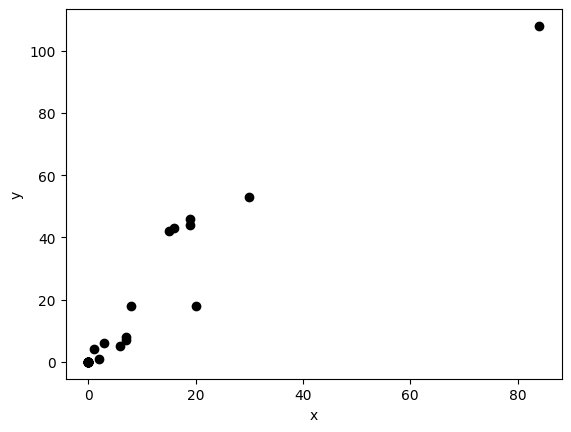

In [8]:
x1 = df.iloc[2]
y1 = df.iloc[5]
x1 = np.array(x1[1:-1])# remove non-MT
y1 = np.array(y1[1:-1])
x = x1.astype(float)#it must be float
y = y1.astype(float)
plt.plot(x,y,"ko")
plt.xlabel("x")
plt.ylabel("y")
print(x)

I defined the whole process as a function, basically it's the example given

In [6]:
def linfitplot(x,y):
    linear_model = pm.Model()
# Define the PyMC model
    with linear_model:
        # Priors for unknown parameters
        a_prior = pm.Normal('a', mu=0, sigma=10)
        b_prior = pm.Normal('b', mu=0, sigma=10)
        sigma_prior = pm.HalfNormal('sigma', sigma=2)

        # Expected value of outcome
        mu = a_prior * x + b_prior

        # Likelihood (sampling distribution) of observations
        vals = pm.Normal('vals', mu=mu, sigma=sigma_prior, observed=y)
        
        step = pm.Slice()
        tracel = pm.sample(1000, step=step, return_inferencedata=True)
        ppc_samples = pm.sample_posterior_predictive(tracel)
    
    ppc_vals = np.asarray(ppc_samples["posterior_predictive"].vals)
    
    for y_i in ppc_vals[0]:
        plt.plot(x,y_i,alpha=0.1,color="pink")
    
    plt.plot(x,y,"ko",label="Data")
    plt.legend()
    plt.xlabel("x")
    plt.xlabel("y")

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [a]
>Slice: [b]
>Slice: [sigma]


/home/gitpod/.pyenv/versions/3.12.3/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Sampling: [vals]


/home/gitpod/.pyenv/versions/3.12.3/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

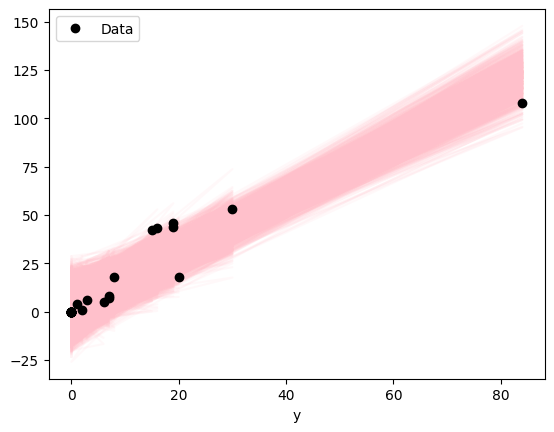

In [9]:
linfitplot(x,y)